# (sFigure9)-The Developmental Trajectories of CD8+ CXCL13+ Tex Cells.

In [6]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np

In [7]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [62]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]
adata_CD8

AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [63]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

In [64]:
adata_CD8_part = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.GZMK+.Tn','CD8.GZMK+.early_Tem','CD8.CXCL13+.Termianl_Tex'])]
sc.pp.neighbors(adata_CD8_part, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_CD8_part,resolution=1.5)
sc.tl.paga(adata_CD8_part)
sc.pl.paga(adata_CD8_part, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_CD8_part,init_pos='paga')
adata_CD8_part

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


AnnData object with n_obs × n_vars = 1341 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

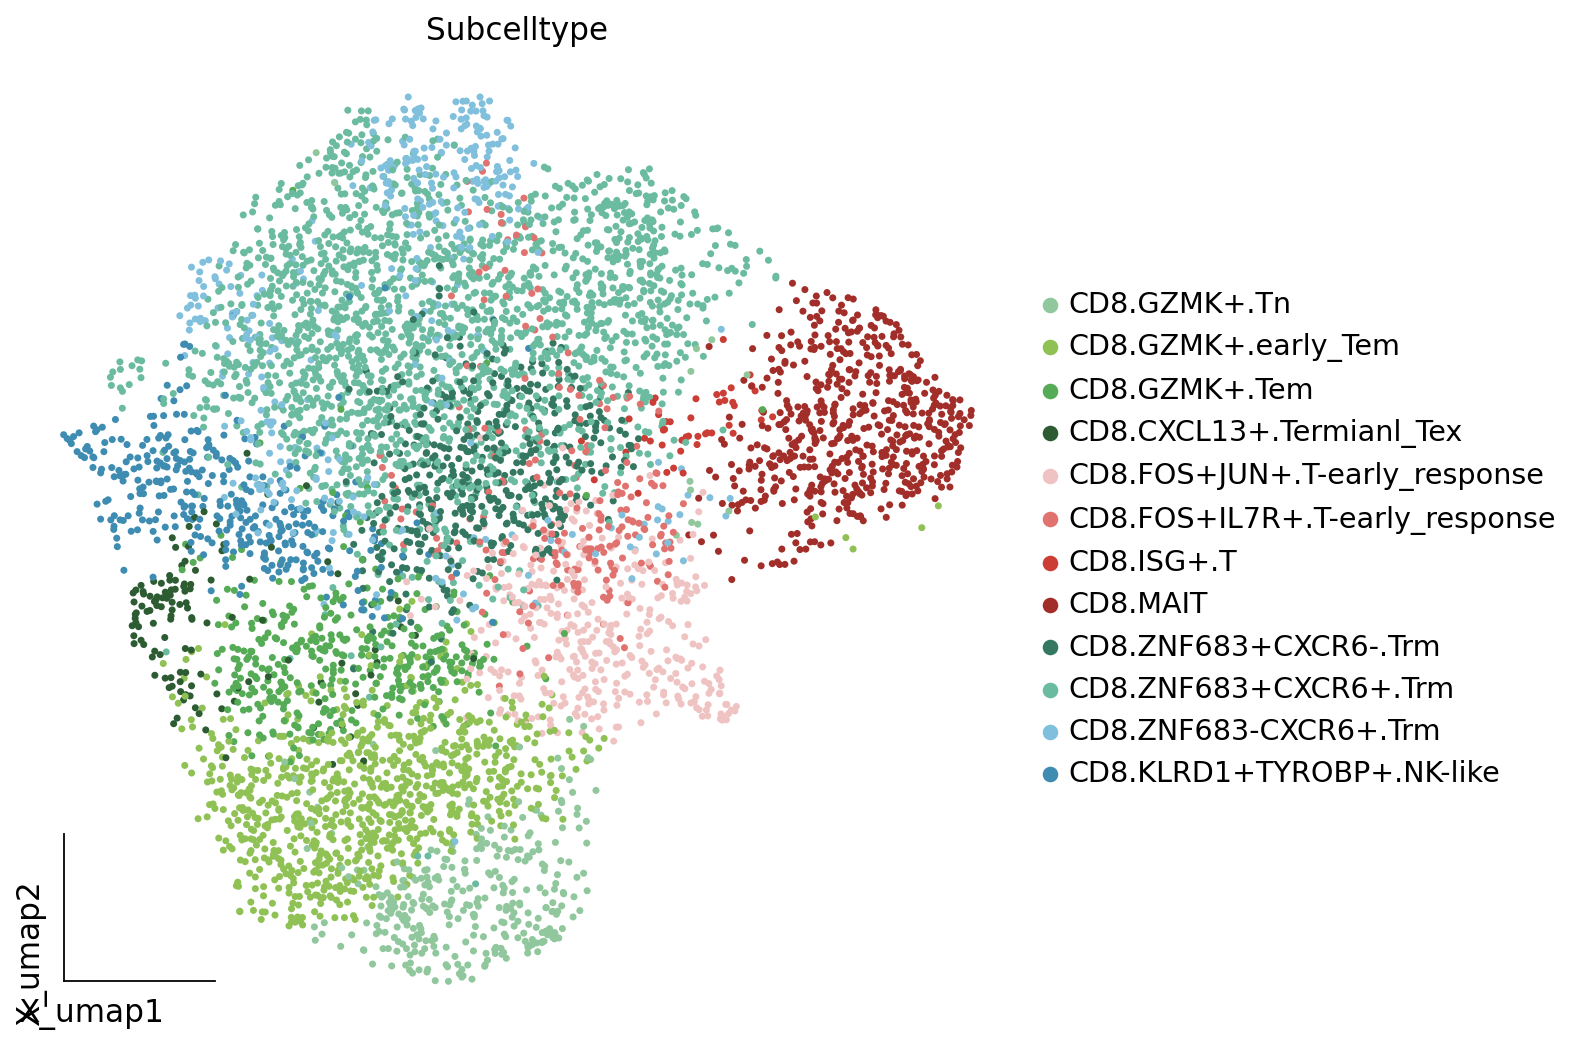

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD8,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=40)

In [66]:
sc.pp.neighbors(adata_CD8_part, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_CD8_part,resolution=1.5)
sc.tl.paga(adata_CD8_part)
sc.pl.paga(adata_CD8_part, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_CD8_part,init_pos='paga')
adata_CD8_part

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


AnnData object with n_obs × n_vars = 1341 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

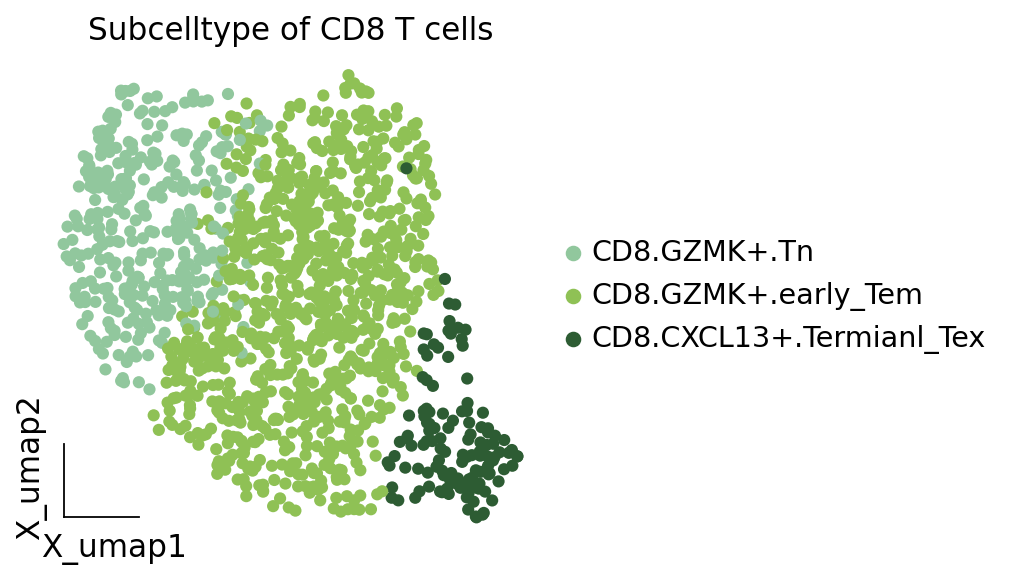

In [86]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(adata_CD8_part,
                basis='X_umap',frameon='small',title='Subcelltype of CD8 T cells',
                color=['Subcelltype'],show=False,ax=ax,size=120)
plt.savefig("Gastric/Figure/sFigure9/sFigure9_A.png",dpi=300,bbox_inches = 'tight')

[<AxesSubplot: title={'center': 'IL7R'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'GZMK'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'CXCL13'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'HAVCR2'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'CTLA4'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'TIGIT'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'HAVCR2'}, xlabel='X_umap1', ylabel='X_umap2'>]

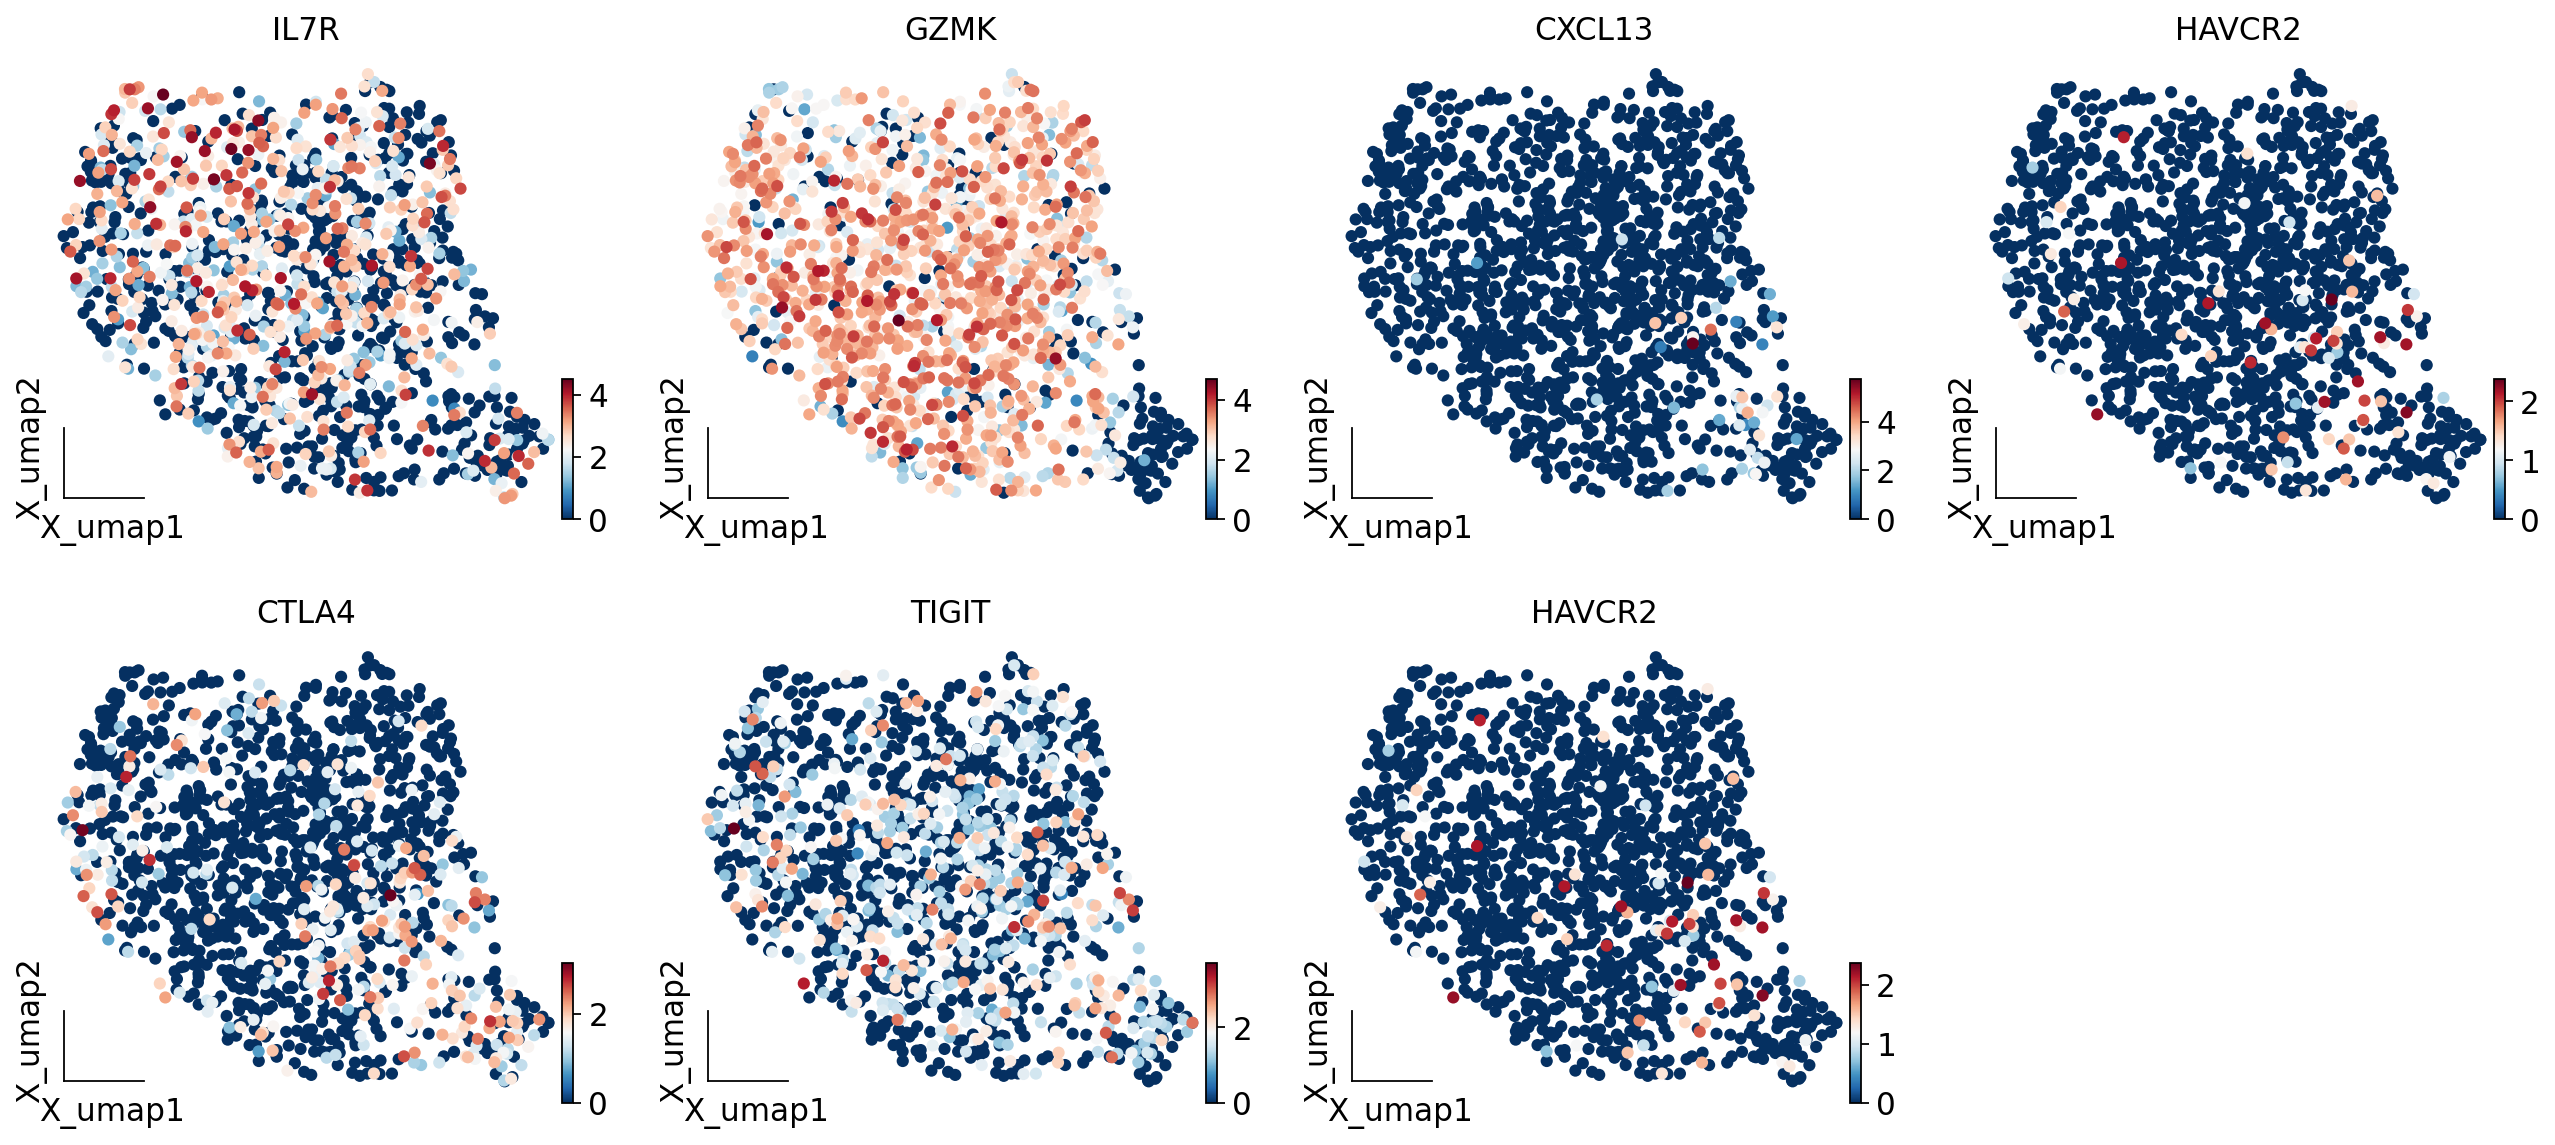

In [87]:
ov.utils.embedding(adata_CD8_part,
                basis='X_umap',frameon='small',
                color=['IL7R','GZMK','CXCL13','HAVCR2','CTLA4','TIGIT','HAVCR2'],show=False,size=120,cmap='RdBu_r')

In [ ]:
ov.utils.cal_paga(adata_CD8,use_time_prior='dpt_pseudotime',vkey='paga',
                 groups='clusters')
ov.utils.plot_paga(adata_CD8,basis='umap', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

In [90]:
help(v0.plot_trajectory_gams)

Help on method plot_trajectory_gams in module omicverse.single._via:

plot_trajectory_gams(clusters: str = '', basis: str = '', via_fine=None, idx=None, title_str: str = 'Pseudotime', draw_all_curves: bool = True, arrow_width_scale_factor: float = 15.0, scatter_size: float = 50, scatter_alpha: float = 0.5, figsize: tuple = (8, 4), linewidth: float = 1.5, marker_edgewidth: float = 1, cmap_pseudotime: str = 'viridis_r', dpi: int = 80, highlight_terminal_states: bool = True, use_maxout_edgelist: bool = False) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes, matplotlib.axes._axes.Axes] method of omicverse.single._via.pyVIA instance
    projects the graph based coarse trajectory onto a umap/tsne embedding
    
    Arguments:
        clusters : column name of the adata.obs dataframe that contains the cluster labels
        basis : str, default = 'X_umap', which to use for the embedding
        via_fine : via object suggest to use via_object only unless you found that running vi

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


2024-04-11 21:38:30.991732	Super cluster 3 is a super terminal with sub_terminal cluster 3
2024-04-11 21:38:30.991809	Super cluster 4 is a super terminal with sub_terminal cluster 4


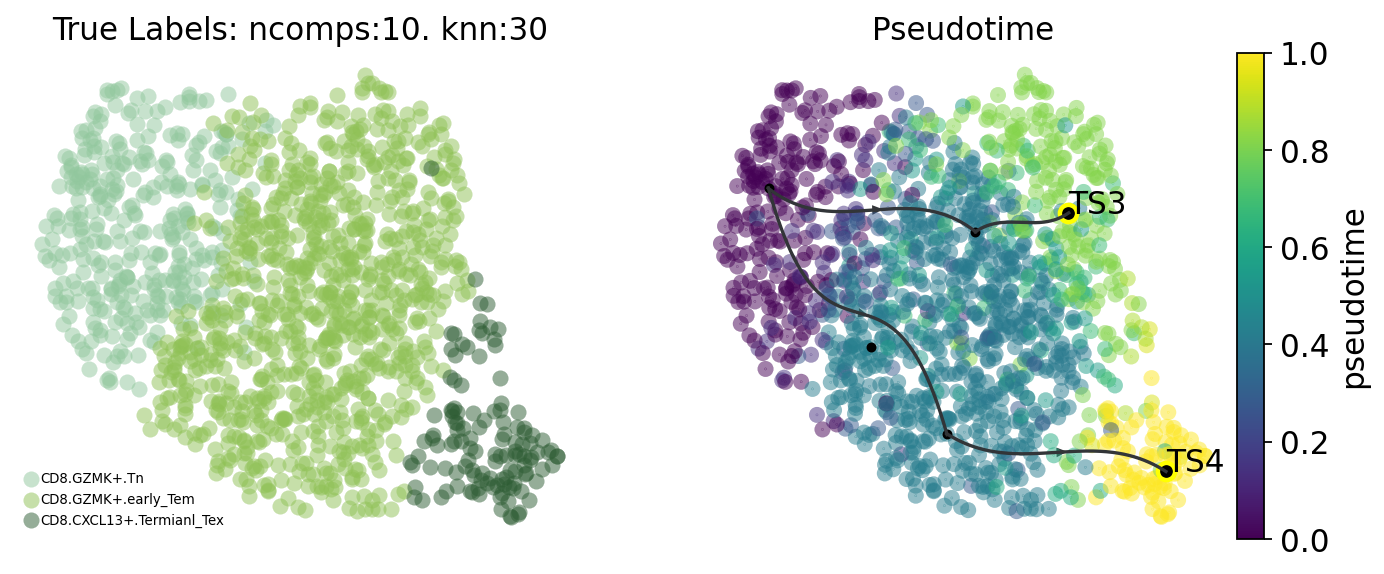

In [91]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Subcelltype',draw_all_curves=False,cmap_pseudotime ='viridis',figsize=(10,4))
fig.savefig("Gastric/Figure/sFigure9/sFigure9_B.png",dpi=300,bbox_inches = 'tight')

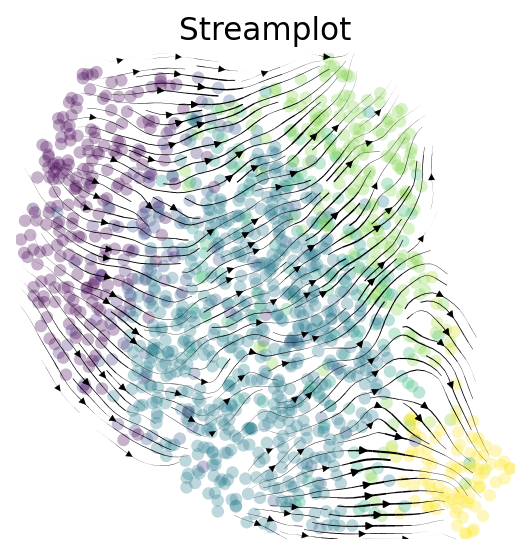

In [76]:
fig,ax=v0.plot_stream(basis='X_umap',density_grid=0.8, scatter_size=30, color_scheme='time', linewidth=0.5,
                             min_mass = 1, cutoff_perc = 5, scatter_alpha=0.3, marker_edgewidth=0.1,cmap_str='viridis',
                             density_stream = 2, smooth_transition=1, smooth_grid=0.5)
fig.savefig("Gastric/Figure/sFigure9/sFigure9_C.png",dpi=300,bbox_inches = 'tight')

shape of transition matrix raised to power 3 (1341, 1341)


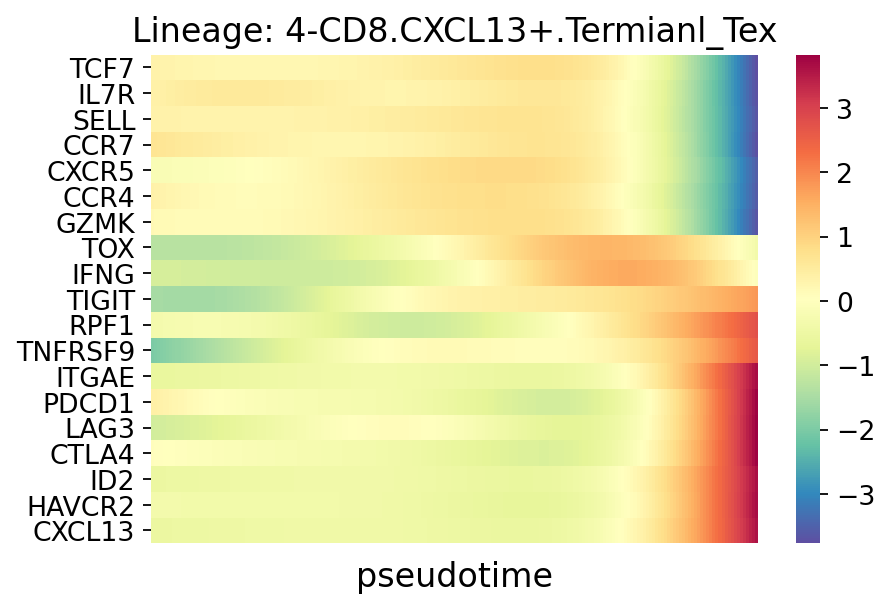

In [128]:
v0.adata = adata_CD8_part.raw.to_adata()
gene_list_magic = ['TCF7','IL7R','SELL','CCR7','CXCR5','CCR4','GZMK','TOX','IFNG','TIGIT','RPF1','TNFRSF9','ITGAE','PDCD1','LAG3','CTLA4','ID2','HAVCR2','CXCL13',]
fig,ax=v0.plot_gene_trend_heatmap(gene_list=gene_list_magic,figsize=(6,4),fontsize=12,cmap='Spectral_r',
                          marker_lineages=[4])
fig.savefig("Gastric/Figure/sFigure9/sFigure9_D.png",dpi=300,bbox_inches = 'tight')

In [77]:
help(v0.plot_gene_trend_heatmap)

Help on method plot_gene_trend_heatmap in module omicverse.single._via:

plot_gene_trend_heatmap(gene_list: list, marker_lineages: list = [], fontsize: int = 8, cmap: str = 'viridis', normalize: bool = True, ytick_labelrotation: int = 0, figsize: tuple = (2, 4)) -> Tuple[matplotlib.figure.Figure, list] method of omicverse.single._via.pyVIA instance
    Plot the gene trends on heatmap: a heatmap is generated for each lineage (identified by terminal cluster number). Default selects all lineages
    
    Arguments:
        gene_list : list of genes to plot
        marker_lineages : list default = None and plots all detected all lineages. Optionally provide a list of integers corresponding to the cluster number of terminal cell fates
        fontsize : int default = 8
        cmap : str default = 'viridis'
        normalize : bool = True
        ytick_labelrotation : int default = 0
        figsize : size of the figure
    
    Returns:
        fig : matplotlib figure
        axs : list of

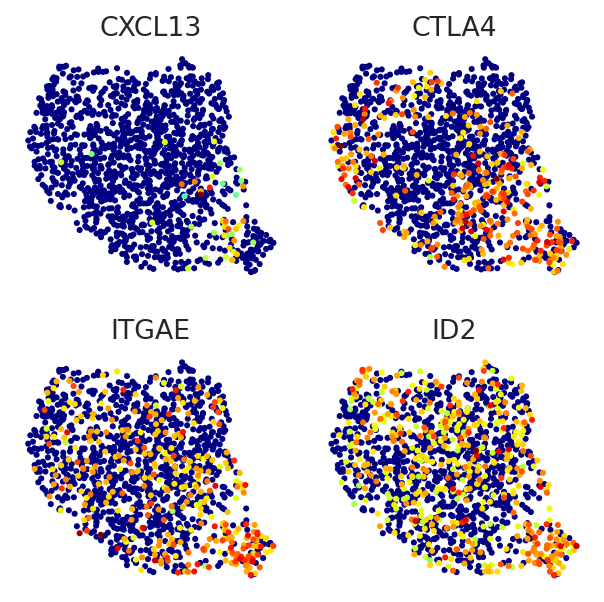

In [179]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,4), sharex=True, sharey=True)
all_genes=['CXCL13','CTLA4','ITGAE','ID2']
for i, row_axes in enumerate(axes):
    for j, ax in enumerate(row_axes):
        axes = ov.utils.embedding(adata,
                               basis='X_umap',
                               color=all_genes[i * 2 + j],
                               title=all_genes[i * 2 + j],
                               frameon=False,
                               show=False,
                               legend_loc=False,
                               color_map = mpl.cm.get_cmap('jet'),
                               colorbar_loc=None,
                               legend_fontsize=18,size=30,
                               ax=ax)
        axes.set_title(all_genes[i * 2 + j],fontdict={'size':12})

plt.tight_layout()
plt.savefig("Gastric/Figure/sFigure9/sFigure9_E.png",dpi=300,bbox_inches = 'tight')
plt.show()


[<AxesSubplot: title={'center': 'CXCL13'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'CTLA4'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'ITGAE'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'ID2'}, xlabel='X_umap1', ylabel='X_umap2'>]

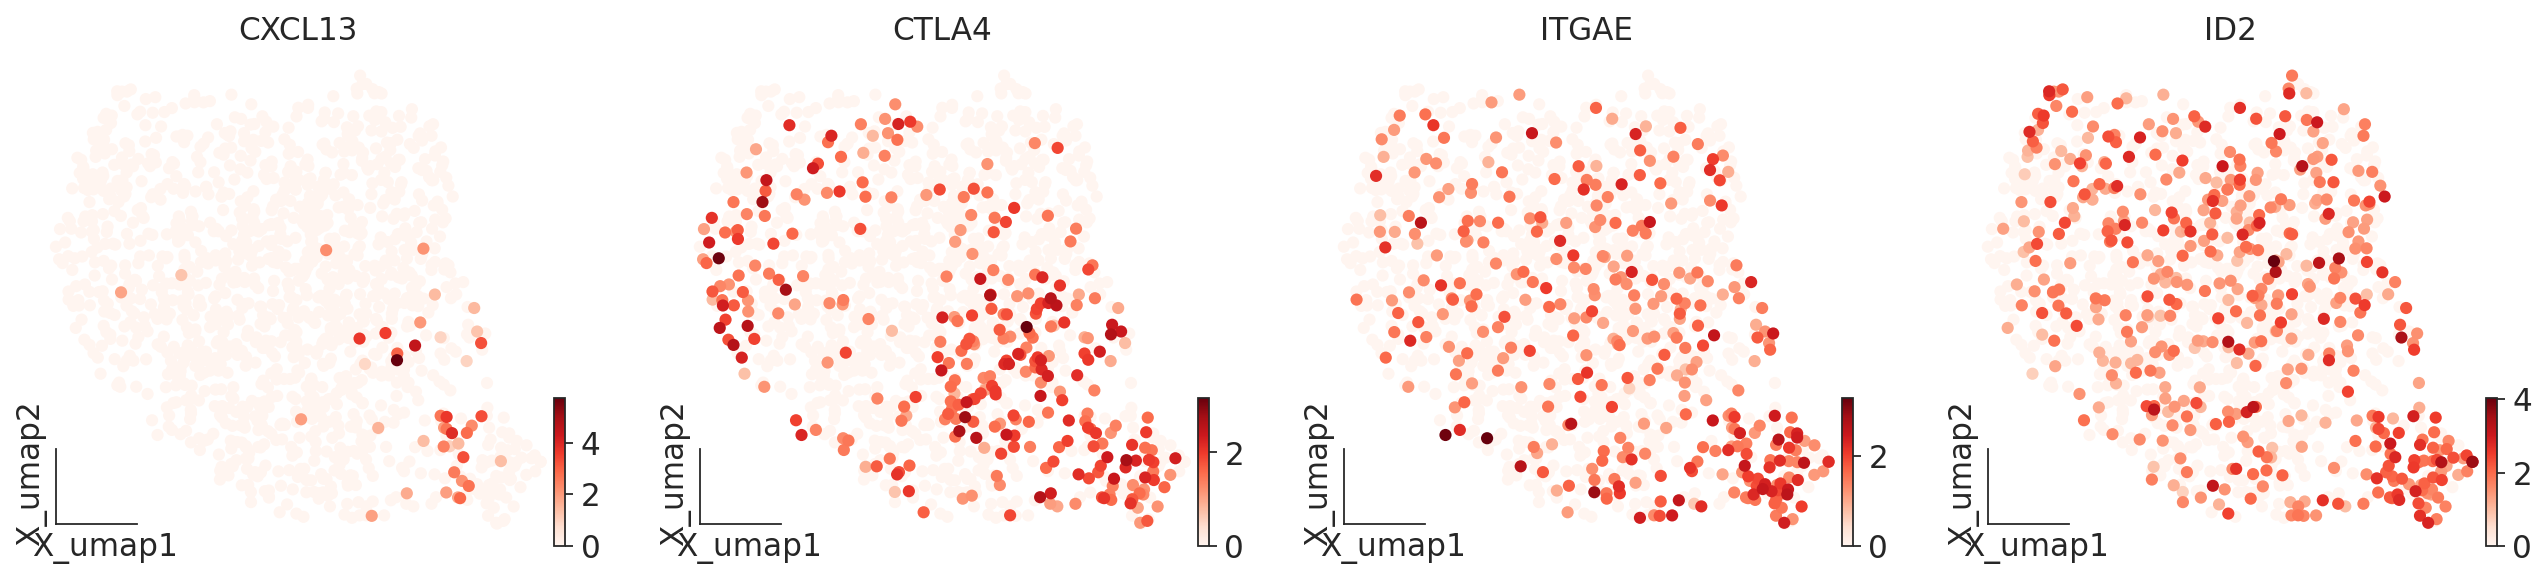

In [146]:
ov.utils.embedding(adata_CD8_part,
                basis='X_umap',frameon='small',
                color=['CXCL13','CTLA4','ITGAE','ID2'],show=False,size=120,cmap='Reds')

In [94]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw = adata_raw[adata_CD8_part.obs.index]
adata_raw.obs = adata_CD8_part.obs
adata_raw.uns = adata_CD8_part.uns
adata_raw.obsm = adata_CD8_part.obsm
adata_raw

AnnData object with n_obs × n_vars = 1341 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'pt_via'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [95]:
adata = adata_raw
adata = adata[:,~adata.var_names.str.contains('RPS')]
adata = adata[:,~adata.var_names.str.contains('RPL')]
#normalize and high variable genes (HVGs) calculated
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]

adata.layers['lognorm'] = adata.X
adata

Begin robust gene identification
After filtration, 18068/32115 genes are kept. Among 18068 genes, 18068 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['GKN1', 'IGLV1-47']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 1341 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'pt_via'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

In [96]:
set(adata.obs['Subcelltype_ID_type'])

{'C1.CD8.GZMK+.Tn', 'C2.CD8.GZMK+.early_Tem', 'C4.CD8.CXCL13+.Termianl_Tex'}

In [108]:
dds=ov.bulk.pyDEG(adata.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=adata.obs[adata.obs['Subcelltype_ID_type']=='C4.CD8.CXCL13+.Termianl_Tex'].index.tolist()
control_groups=adata.obs[adata.obs['Subcelltype_ID_type']=='C2.CD8.GZMK+.early_Tem'].index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=0,
                   pval_threshold=0.01,
                   logp_max=20)


... drop_duplicates_index success
... Fold change threshold: 0


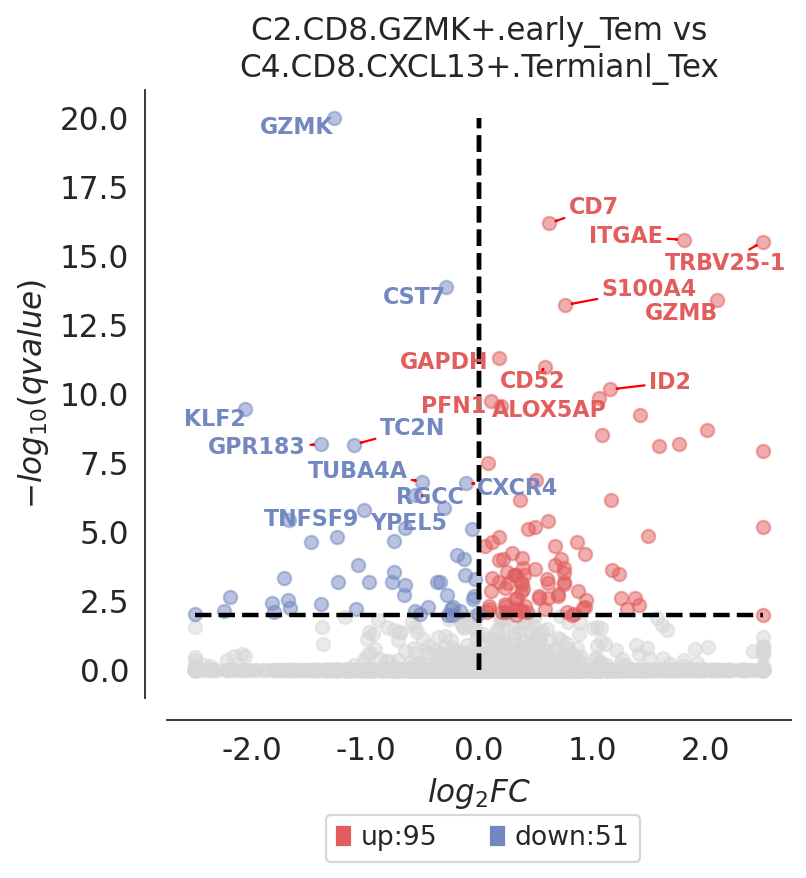

In [178]:
dds.result.loc[dds.result['log2FC']>2.5,'log2FC'] = 2.5
dds.result.loc[dds.result['log2FC']<-2.5,'log2FC'] = -2.5
#dds.result[dds.result['abs(log2FC)']>5] = 5
ax = dds.plot_volcano(title='C2.CD8.GZMK+.early_Tem vs\nC4.CD8.CXCL13+.Termianl_Tex',figsize=(5,5),
                 plot_genes_num=20,plot_genes_fontsize=10,legend_bbox=(0.78, -0.17))
plt.savefig("Gastric/Figure/sFigure9/sFigure9_F.png",dpi=300,bbox_inches = 'tight')

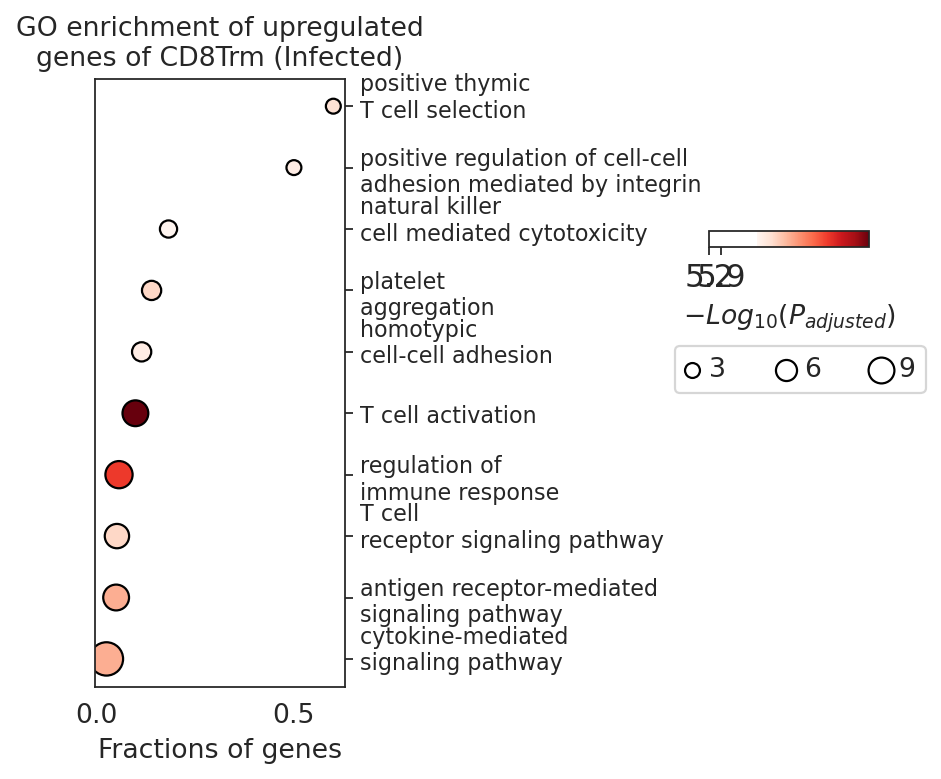

In [160]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='GO enrichment of upregulated\ngenes of CD8Trm (Infected)',
                          node_size=[3, 6, 9],
                          cax_loc=[2.10, 0.7, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.3, -10),node_diameter=15,custom_ticks=[5.2,5.9],
                        cmap='Reds')
#plt.savefig('Gastric/Figure/Figure2/Figure2_I',dpi=300,bbox_inches = 'tight')

In [137]:
def insert_newlines(s, n=50):
    if len(s) <= n:
        return s
    parts = s.split(' ')
    new_s = parts[0]
    for part in parts[1:]:
        if len(new_s) - new_s.rfind('\n') + len(part) + 1 > n:
            new_s += '\n' + part
        else:
            new_s += ' ' + part
    return new_s


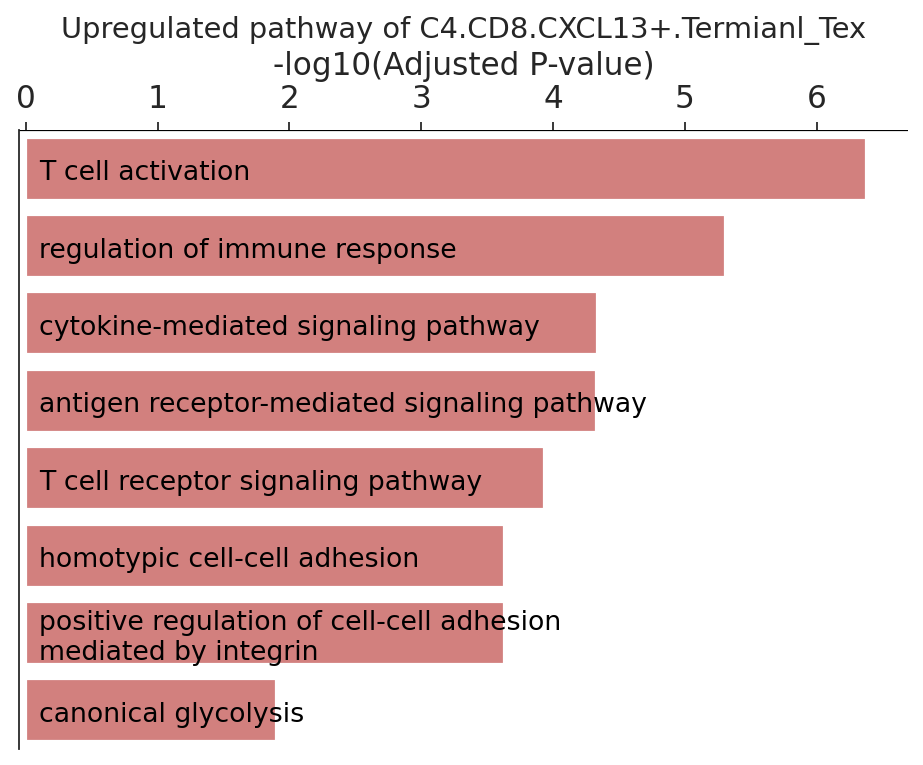

In [158]:

enr_used = enr[enr.loc[:,'Term'].isin(['T cell activation (GO:0042110)','regulation of immune response (GO:0050776)',
                                  'cytokine-mediated signaling pathway (GO:0019221)','antigen receptor-mediated signaling pathway (GO:0050851)',
                                  'T cell receptor signaling pathway (GO:0050852)','homotypic cell-cell adhesion (GO:0034109)',
                                  'canonical glycolysis (GO:0061621)','positive regulation of cell-cell adhesion mediated by integrin (GO:0033634)',
])]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')


enr_used['Term'] = enr_used['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr_used['-log10(Adjusted P-value)'] = -np.log10(enr_used['Adjusted P-value'])
enr_sorted = enr_used.sort_values('-log10(Adjusted P-value)', ascending=False)

enr_sorted['Term'] = enr_sorted['Term'].apply(insert_newlines)

f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True)  #
colors = [ov.pl.red_color[1]]*len(enr.index)  # 
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', fontsize=12,
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  # 
ax.set_title('Upregulated pathway of C4.CD8.CXCL13+.Termianl_Tex', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig("Gastric/Figure/sFigure9/sFigure9_G.png",dpi=300,bbox_inches = 'tight')
plt.show()